In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ipywidgets as widgets

In [2]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('data/simulations/')]

def concat(list_of_files):
    '''
    Takes a list of files and concatenates them into a single dataframe
    '''
    li = []
    for filename in list_of_files:
        df = pd.read_csv('data/simulations/' + filename, index_col=None, header=0)
        li.append(df)

    frame = pd.concat(li, axis=0, ignore_index=True)
    return frame


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data/simulations/'

In [ ]:
df = concat(onlyfiles)

In [ ]:
df =df[df['k']!=10]

In [ ]:
grouped = df.groupby(by = ['k', 'n']).mean()

In [ ]:
grouped['formatted'] = np.exp(1/(100*grouped.percent_diff))
grouped.reset_index(inplace = True)

In [ ]:
grouped

,k,n,Unnamed: 0,differences,percent_diff,matches,formatted
0,3,100,499.5,0.412,0.004911,84.356,7.661897e+00
1,3,500,499.5,0.426,0.001015,420.490,1.893336e+04
2,3,1000,499.5,0.422,0.000502,840.634,4.514321e+08
3,3,5000,499.5,0.370,0.000088,4203.412,2.054012e+49
4,3,10000,499.5,0.370,0.000044,8405.988,4.485368e+98
5,5,100,499.5,3.910,0.042896,91.070,1.262533e+00
6,5,500,499.5,4.628,0.010174,454.811,2.672287e+00
7,5,1000,499.5,5.068,0.005576,908.912,6.010430e+00
8,5,5000,499.5,5.352,0.001178,4542.926,4.852764e+03
9,5,10000,499.5,5.274,0.000581,9084.155,3.021336e+07


interactive(children=(FloatSlider(value=1.0, description='A', max=1.0, step=0.0001), Output()), _dom_classes=(…

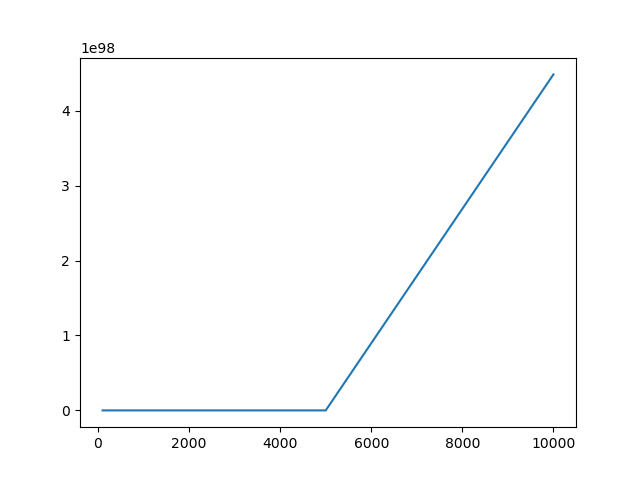

In [ ]:
%matplotlib widget
from ipywidgets import *
import ipympl
import numpy as np
import matplotlib.pyplot as plt

data = grouped[grouped['k']==3]['formatted']

def f(data, A):
    return data**A

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(grouped[grouped['k']==3].n, f(data, 1))


def update(A = 1):
    line.set_ydata(f(data, A))

interact(update, A = (0, 1, 0.0001));